In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
covid = pd.read_csv("covid_worldwide.csv")
covid.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


### Limpieza de datos

In [3]:
covid[covid['Population'].isna()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
90,91,China,"503,302","5,272","379,053","118,977","160,000,000",NaN
226,227,Diamond Princess,712,13,699,0,NaN,NaN
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [4]:
covid.loc[90,'Population']=1454053262
covid.loc[226,'Population']=2666
covid.loc[229,'Population']=2047


In [5]:
covid.drop(columns="Serial Number",inplace=True)
covid.dropna(subset=['Total Recovered'],inplace=True)
covid['Total Test'].fillna(0,inplace=True)
covid['Total Deaths'].fillna(0,inplace=True)
covid[['Total Cases','Total Deaths','Total Recovered','Active Cases','Total Test','Population']] = covid[['Total Cases','Total Deaths','Total Recovered','Active Cases','Total Test','Population']].apply(lambda x:x.str.replace(",","")).apply(lambda x: x.astype("float"),axis=1)
covid.info()
covid.head()

C:\Users\Rainier\AppData\Local\Temp\ipykernel_6556\2978892966.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid['Total Test'].fillna(0,inplace=True)
C:\Users\Rainier\AppData\Local\Temp\ipykernel_6556\2978892966.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 229
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          210 non-null    object 
 1   Total Cases      210 non-null    float64
 2   Total Deaths     206 non-null    float64
 3   Total Recovered  210 non-null    float64
 4   Active Cases     210 non-null    float64
 5   Total Test       197 non-null    float64
 6   Population       207 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.1+ KB


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
1,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
2,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
3,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
4,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08


### Exploracion de datos

In [6]:

class Grafica:
    def __init__(self,x,y,title,ylabel,xlabel,color="blue"):
        self.x =x
        self.y = y
        self.title = title
        self.ylabel = ylabel
        self.xlabel = xlabel
        self.color = color
    def graph(self):
        plt.figure(figsize =(13, 9))
        plt.style.use('fivethirtyeight')
        plt.title(f'{self.title}',loc='center')
        plt.grid()
        plt.xlabel(f'{self.xlabel}',loc='center')
        plt.ylabel(f'{self.ylabel}',loc='center')
        plt.xticks(rotation=70)
        plt.bar(self.x,self.y,width=0.6,color=f'{self.color}',)
        plt.plot(self.x,self.y,color="black",marker="o",)
        plt.grid(color = "black",which='major')
        for a,b in zip(self.x,self.y):
            label = b
            plt.annotate(label, # this is the text
                    (a,b), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,4), # distance from text to points (x,y)
                    ha='left',
                    rotation=50)

        plt.show()


In [7]:
covid['percentages of death'] = 100*covid['Total Deaths']/covid['Population']
covid.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,percentages of death
0,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08,0.338386
1,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09,0.037731
2,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07,0.250414
3,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07,0.197549
4,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08,0.323688


### top 10 paises con mas casos 

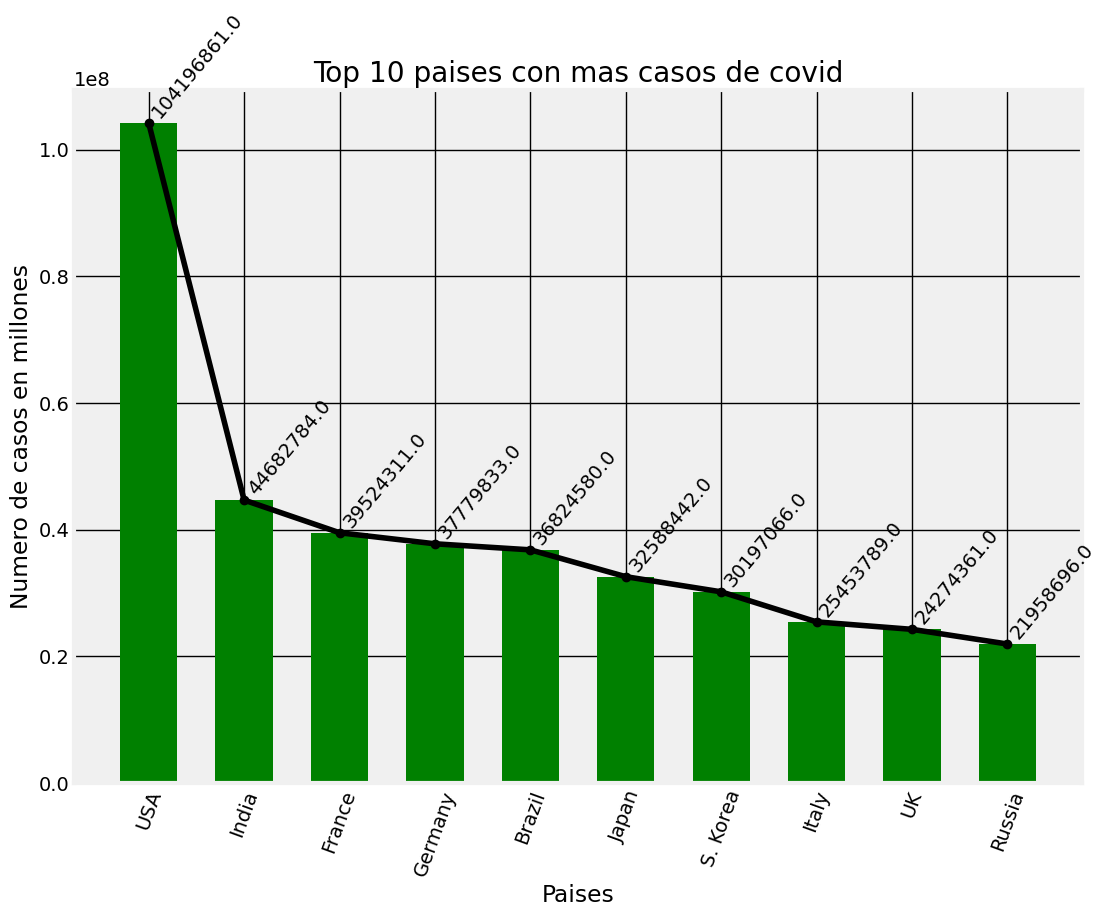

In [8]:
top_10_cases = covid.sort_values(by='Total Cases',ascending=False).head(10)
cases = Grafica(top_10_cases['Country'],top_10_cases['Total Cases'],"Top 10 paises con mas casos de covid","Numero de casos en millones","Paises",'green')
cases.graph()

### top 10 paises con casos activos 

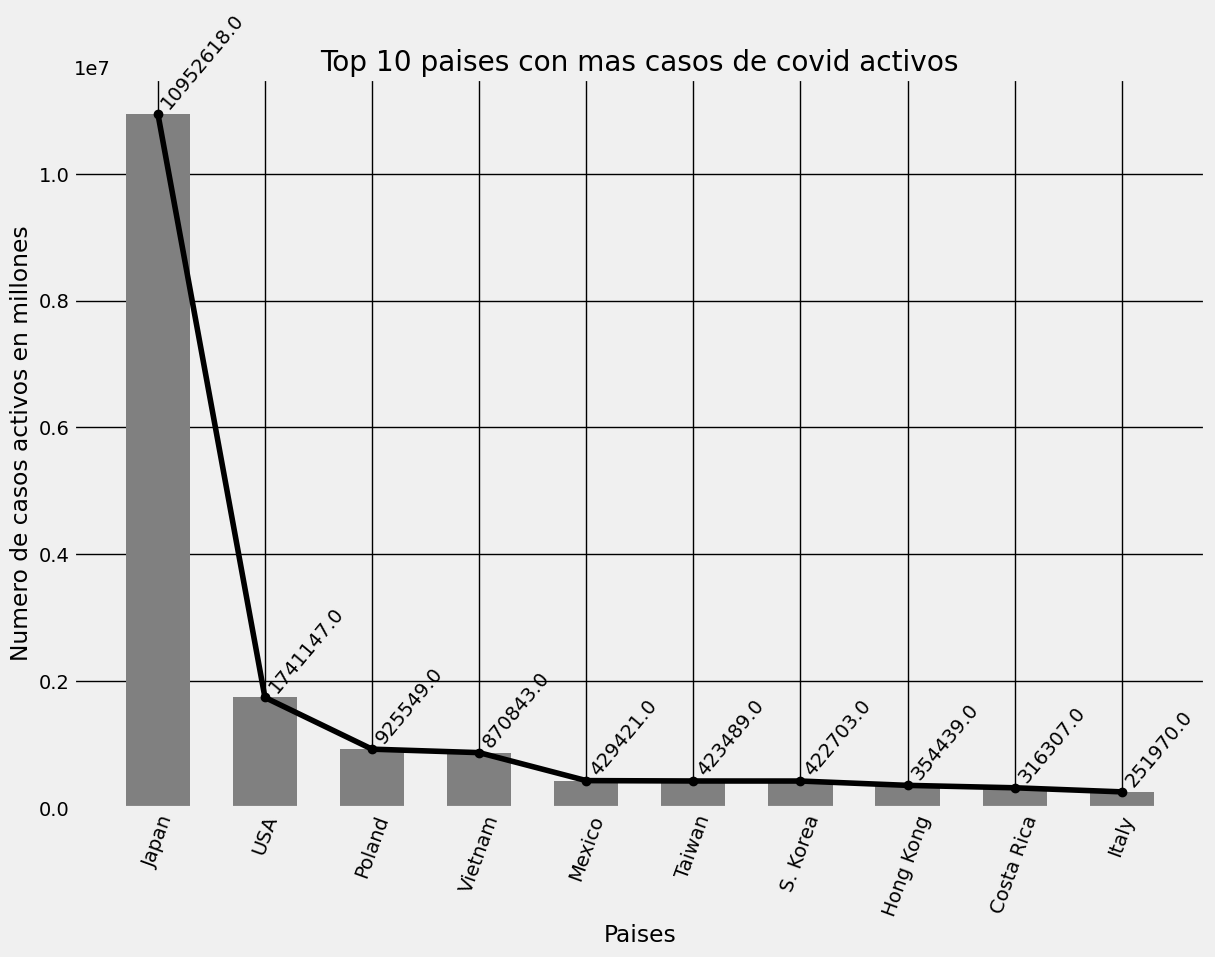

In [9]:
top_10_active_cases = covid.sort_values(by='Active Cases',ascending=False).head(10)
active_cases = Grafica(top_10_active_cases['Country'],top_10_active_cases['Active Cases'],"Top 10 paises con mas casos de covid activos","Numero de casos activos en millones","Paises",'gray')
active_cases.graph()

# Top 10 paises con muertes 

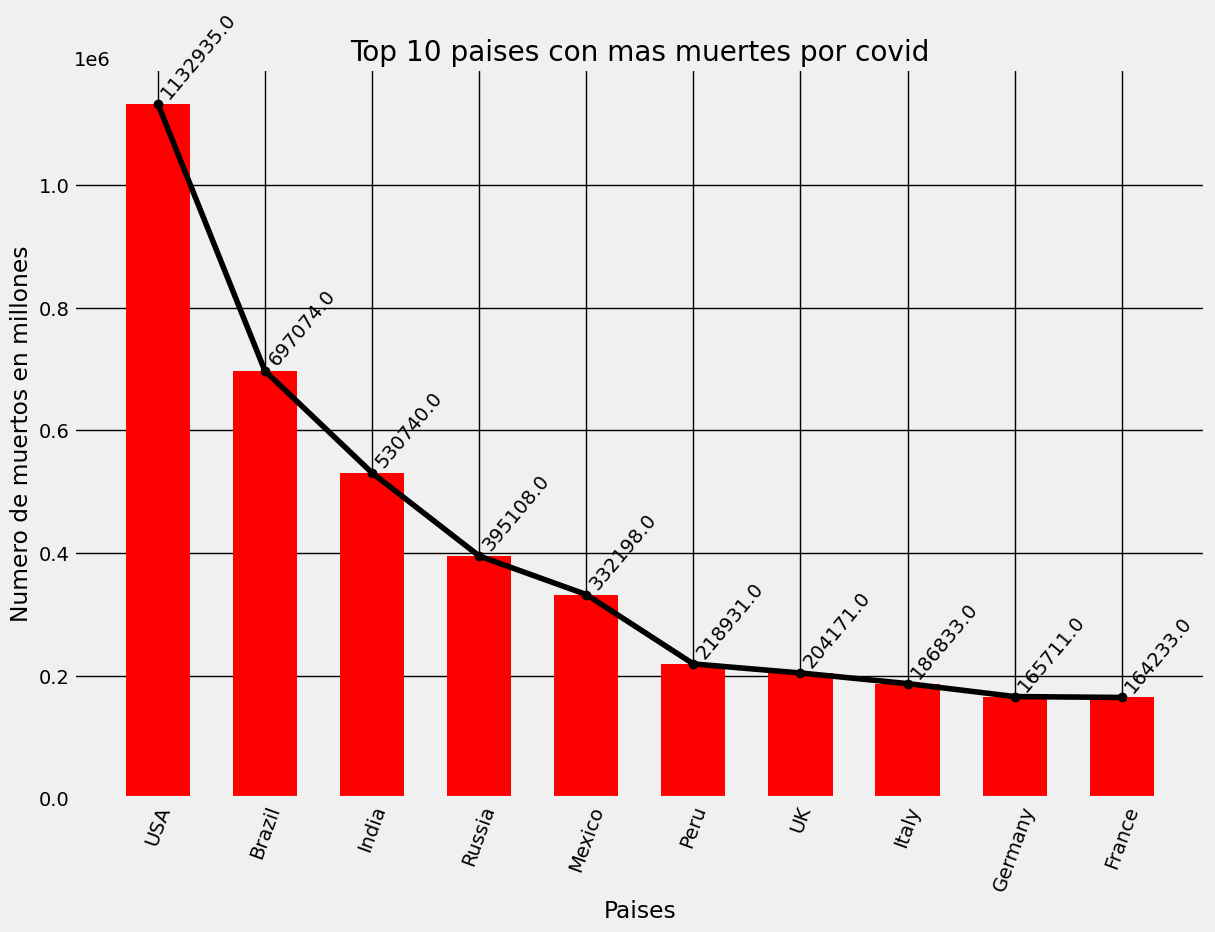

In [10]:
top_10_number_death = covid.sort_values(by='Total Deaths',ascending=False).head(10)

number_death= Grafica(top_10_number_death['Country'],top_10_number_death['Total Deaths'],"Top 10 paises con mas muertes por covid","Numero de muertos en millones","Paises",'red')
number_death.graph()

### Proporcion de muertes por pais 

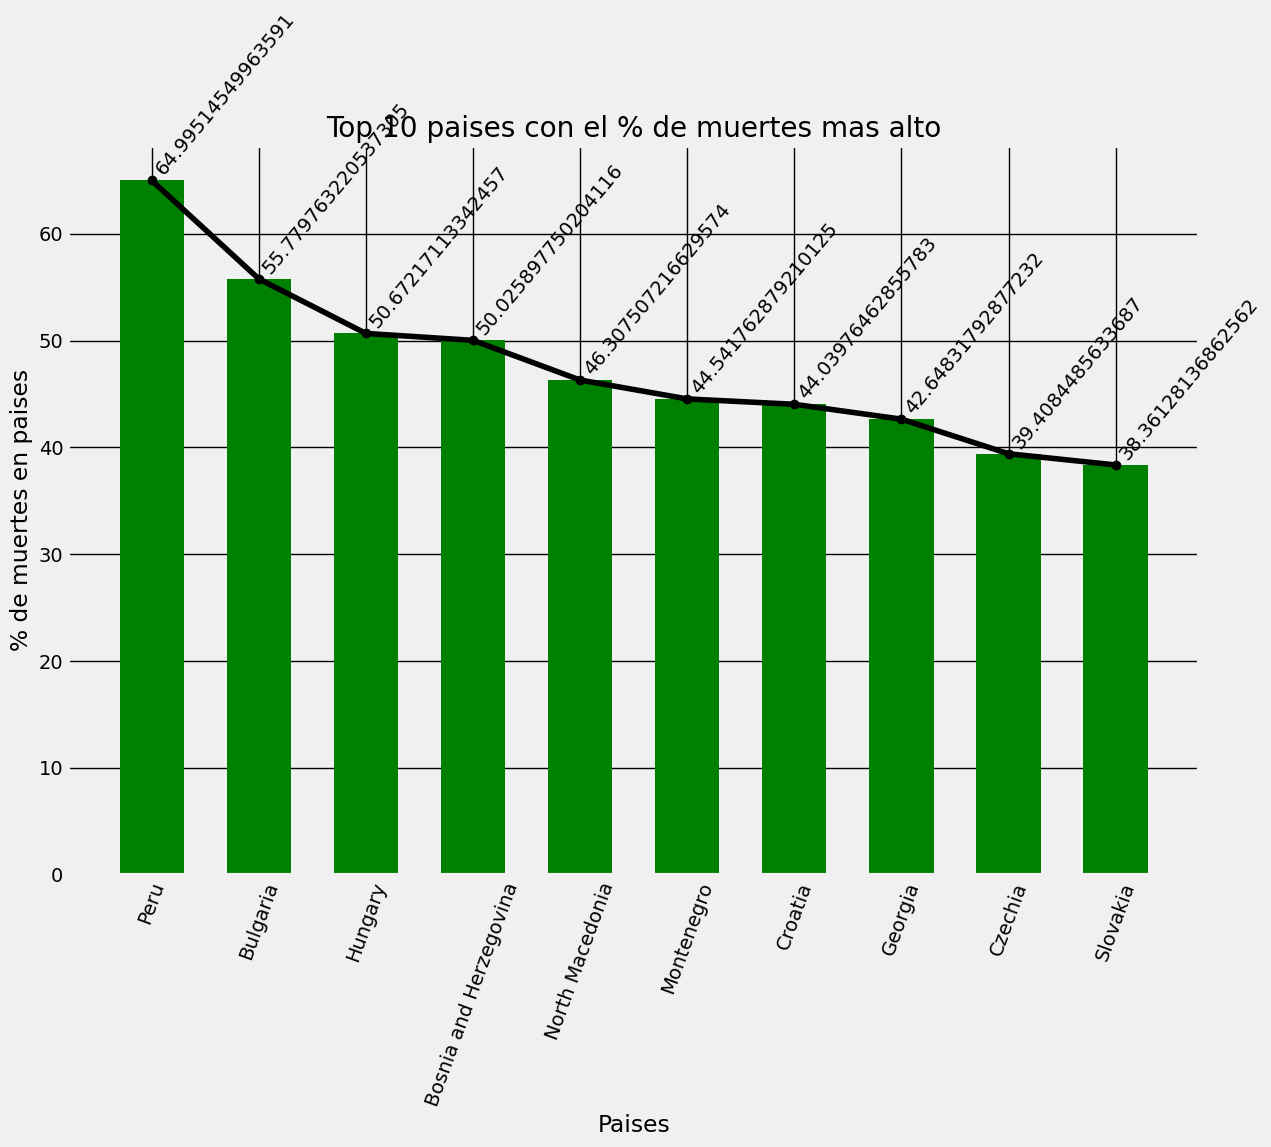

In [11]:
pod = covid.sort_values(by="percentages of death",ascending=False).head(10)
porcentages_of_death = Grafica(pod['Country'],pod['percentages of death']*100,'Top 10 paises con el % de muertes mas alto','% de muertes en paises','Paises','green') 
porcentages_of_death.graph()


### top 10 paises con mayor porcentaje de  Infeccion del covid 

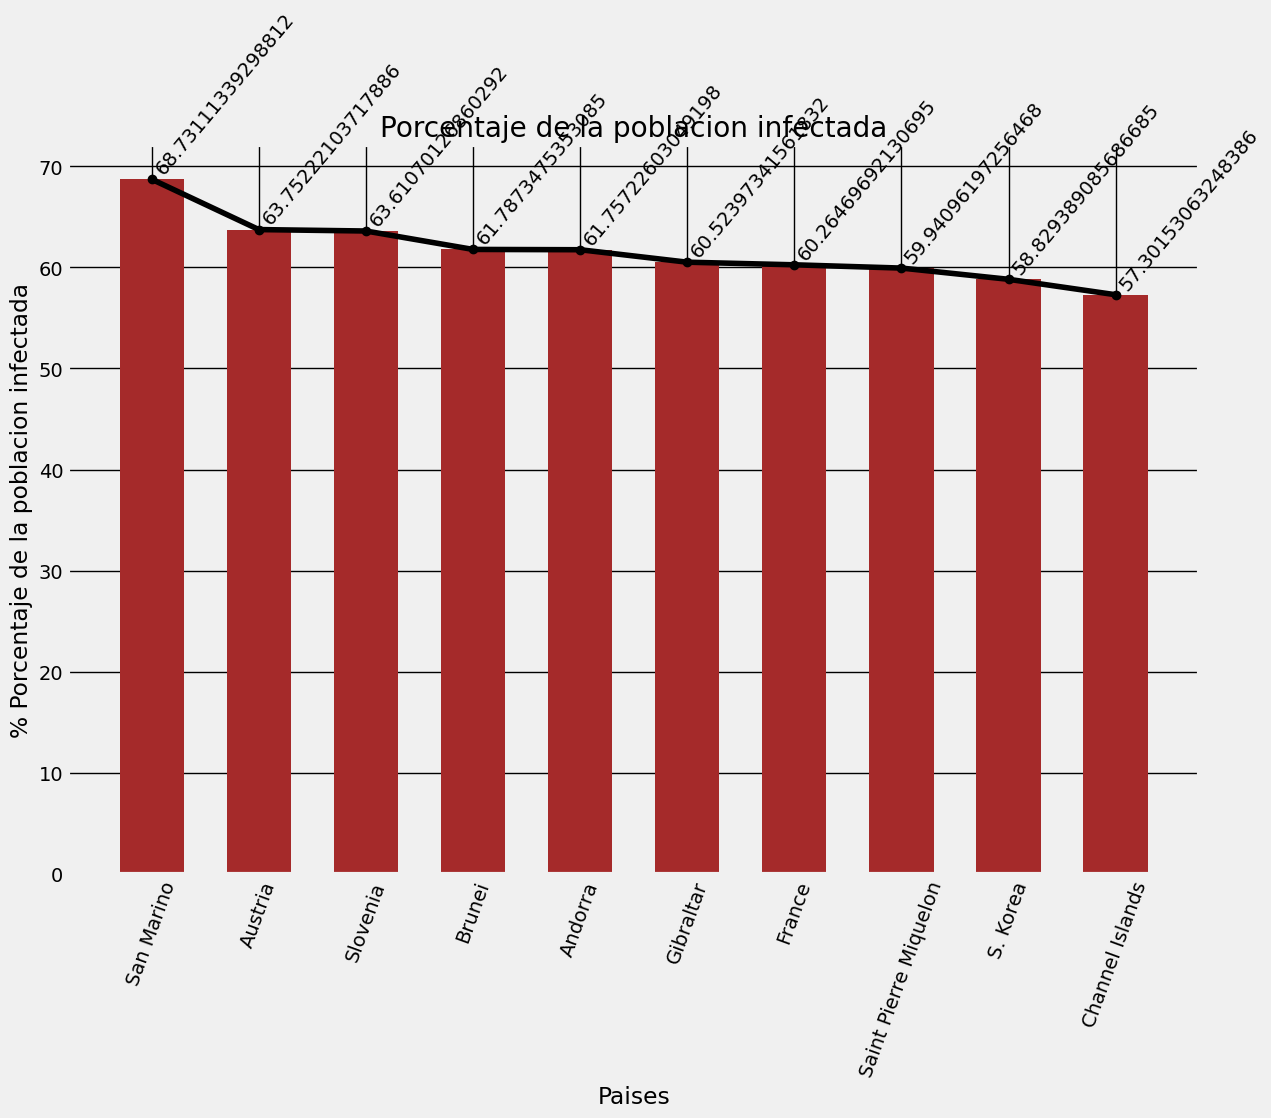

In [12]:
covid['infection'] = 100*covid['Total Cases']/covid['Population']
infection = covid.sort_values(by="infection",ascending=False).head(10)
infec = Grafica (infection['Country'],infection["infection"],"Porcentaje de la poblacion infectada","% Porcentaje de la poblacion infectada","Paises","brown")
infec.graph()